## Predicting bird name from audio file

In [1]:
#import
import os 
import pandas as pd
import torch 
import IPython.display as ipd
import matplotlib.pyplot as plt
import random
import json

#import modules
from model import BirdAudioClassifierModel
from utils import *
from classifier import BirdAudioClassifier

### Load the Bird Classifier

In [2]:
#Create the model
num_bird_classes = 88
model = BirdAudioClassifierModel(num_classes=num_bird_classes)
#load the trained model 
model.load_state_dict(torch.load('Models\model2.pth'))

<All keys matched successfully>

In [3]:
#Initialize the classifier
confidence_threshold = 0.1 #set the minimum confidence needed for a classification to be valid
BirdClassifier = BirdAudioClassifier(model=model, confidence_threshold=confidence_threshold)

In [4]:
#load the class id to name mapping
dict_file_path = "Dataset\\class_id_to_name_mapping.json"
with open(dict_file_path, "r") as file: 
    load_dict = json.load(file)
    #convert the keys to integers
    class_id_to_name_dict = {int(key): value for key, value in load_dict.items()}

print(class_id_to_name_dict)

{0: 'Long-tailed Tit', 1: 'Eurasian Golden Oriole', 2: 'Wood Warbler', 3: 'Lesser Whitethroat', 4: 'Common Starling', 5: 'Eurasian Collared Dove', 6: 'Common Reed Bunting', 7: 'Common Linnet', 8: 'Yellowhammer', 9: 'Western Yellow Wagtail', 10: 'Wood Sandpiper', 11: 'Garden Warbler', 12: 'Spotted Flycatcher', 13: 'Goldcrest', 14: 'Eurasian Wryneck', 15: 'Common Redshank', 16: 'River Warbler', 17: 'European Honey Buzzard', 18: 'Eurasian Bullfinch', 19: 'Rock Dove', 20: 'Dunlin', 21: 'African Pied Wagtail', 22: 'Sedge Warbler', 23: 'Eurasian Magpie', 24: 'Redwing', 25: 'Common Pheasant', 26: 'Common Chaffinch', 27: 'Willow Warbler', 28: 'Western Jackdaw', 29: 'Common Chiffchaff', 30: 'Great Tit', 31: 'Corn Bunting', 32: 'Eurasian Skylark', 33: 'Common Nightingale', 34: 'European Greenfinch', 35: 'Eurasian Reed Warbler', 36: 'European Herring Gull', 37: 'Eurasian Jay', 38: 'Common Blackbird', 39: 'Black-headed Gull', 40: 'Willow Ptarmigan', 41: 'Eurasian Treecreeper', 42: 'Black Woodpecke

### Predicting bird name from spectrogram

In [5]:
#load metadata df 
current_dir = os.getcwd() 
file_name = "Dataset\\metadata.csv"
file_path = os.path.join(current_dir, file_name) 
df_metadata = pd.read_csv(file_path)
display(df_metadata)

,file_id,original_file_id,english_cname,path,class_id
0,1,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
1,2,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
2,3,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
3,4,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
4,5,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
...,...,...,...,...,...
3543,3544,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3544,3545,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3545,3546,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3546,3547,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75


In [6]:
#open a random audio file 
#generate random number in range 
index = random.randint(0, len(df_metadata))
#get the path of the item at the specified index
audio_file_path = df_metadata.loc[index, "path"]
#get the class id 
class_id = df_metadata.loc[index, "class_id"]
#get the english bird name 
name = df_metadata.loc[index, "english_cname"]

#get the spectrogram 
waveform, sample_rate = AudioUtil.open_file(audio_file_path)        
spectrogram = AudioUtil.get_spectrogram(waveform)

Shape of spectrograms: torch.Size([1, 401, 552]), Class ids: 7


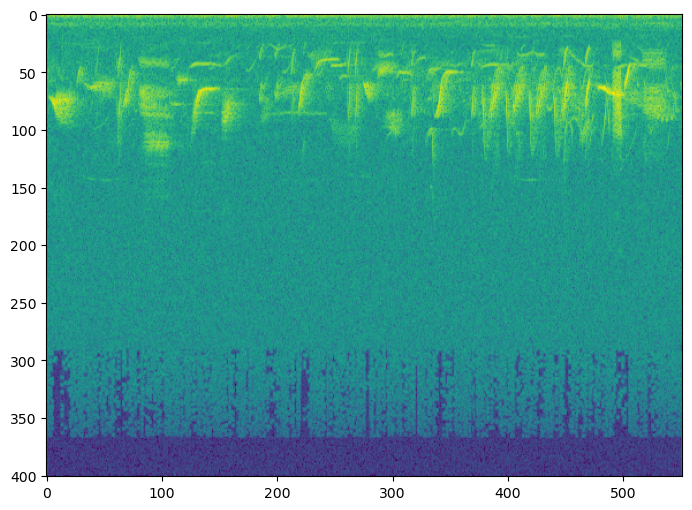

In [7]:
#display the spectrogram
print(f"Shape of spectrograms: {spectrogram.size()}, Class ids: {class_id}")
plt.figure(figsize=(10, 6))
plt.imshow(spectrogram[0,:,:].numpy())

#make the sound wave available
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [8]:
#predict the bird class
pred_class, pred_confidence = BirdClassifier.predict_class_from_spectrogram(spectrogram=spectrogram)

if pred_class is not None: 
    print(f"Predicted bird name: {class_id_to_name_dict[pred_class]}, confidence: {round(pred_confidence*100, 3)}%")
    print(f"Actual bird name: {name}")
else: 
    print("Could not identify a bird in the audio file")

Predicted bird name: Common Linnet, confidence: 97.1%
Actual bird name: Common Linnet


### Predicting bird class from audio file 

In [9]:
'''
Sample bird
File id: 132608
English name: Common Redpoll	
'''
#load audio file
current_dir = os.getcwd() 
songs_path = os.path.join(current_dir, "Dataset\\songs\\songs") 
audio_file_path = os.path.join(songs_path, "xc132608.flac")

In [10]:
#predict the class 
pred_class, pred_confidence = BirdClassifier.predict_class_from_audio_file(file_path=audio_file_path)

if pred_class is not None: 
    print(f"Predicted bird name: {class_id_to_name_dict[pred_class]}, confidence: {round(pred_confidence*100, 3)}%")
    print("Actual bird name: Common Redpoll")
else: 
    print("Could not identify a bird in the audio file")

Predicted bird name: Common Redpoll, confidence: 93.8%
Actual bird name: Common Redpoll


### Testing (delete for submission)

In [9]:
#For testing 
# runn classification on every sample and check the ones where it does not work/the confidence is low, some of the data is not very good training data 
# - maybe you can make a filter that filters bad training data (amount of power in signal in the 5 second clip) as the audio signal is not perfect when 
# and the bird sound is not continous, maybe there is a better way of splitting the audio, (selecting 5 second snippets of interest) 

In [45]:
#testing 
index_list = [random.randint(0, len(df_metadata)) for _ in range(100)]

index_list_broken = []

for i in range(len(df_metadata)): 
    print(f"File index: {i}")
    #get the path of the item at the specified index
    audio_file_path = df_metadata.loc[i, "path"]
    #get the class id 
    class_id = df_metadata.loc[i, "class_id"]
    #get the english bird name 
    name = df_metadata.loc[i, "english_cname"]
    
    #get the spectrogram 
    waveform, sample_rate = AudioUtil.open_file(audio_file_path)        
    spectrogram = AudioUtil.get_spectrogram(waveform)

    # print(f"Shape of spectrograms: {spectrogram.size()}, Class ids: {class_id}")
    # plt.figure(figsize=(10, 6))
    # plt.imshow(spectrogram[0,:,:].numpy())

    pred_class, pred_confidence = BirdClassifier.predict_class_from_spectrogram(spectrogram=spectrogram)
    print(f"Predicted bird name: {class_id_to_name_dict[pred_class]}, confidence: {round(pred_confidence*100, 3)}%")
    print(f"Actual bird name: {name}")

    if class_id != pred_class: 
        print(f"Need double check: {i}")
        # plt.figure(figsize=(10, 6))
        # plt.imshow(spectrogram[0,:,:].numpy())

        index_list_broken.append(i)
    print("\n")



File index: 0
Predicted bird name: Long-tailed Tit, confidence: 99.3%
Actual bird name: Long-tailed Tit


File index: 1
Predicted bird name: Long-tailed Tit, confidence: 95.0%
Actual bird name: Long-tailed Tit


File index: 2
Predicted bird name: Long-tailed Tit, confidence: 100.0%
Actual bird name: Long-tailed Tit


File index: 3
Predicted bird name: Long-tailed Tit, confidence: 100.0%
Actual bird name: Long-tailed Tit


File index: 4
Predicted bird name: Long-tailed Tit, confidence: 100.0%
Actual bird name: Long-tailed Tit


File index: 5
Predicted bird name: Eurasian Golden Oriole, confidence: 100.0%
Actual bird name: Eurasian Golden Oriole


File index: 6
Predicted bird name: Eurasian Golden Oriole, confidence: 100.0%
Actual bird name: Eurasian Golden Oriole


File index: 7
Predicted bird name: Eurasian Golden Oriole, confidence: 100.0%
Actual bird name: Eurasian Golden Oriole


File index: 8
Predicted bird name: Eurasian Golden Oriole, confidence: 100.0%
Actual bird name: Eurasian

In [47]:
print(index_list_broken)
print(len(index_list_broken))

[39, 46, 50, 60, 61, 62, 63, 85, 118, 182, 184, 185, 188, 189, 191, 193, 251, 257, 275, 297, 406, 413, 528, 548, 551, 564, 571, 580, 581, 584, 585, 587, 589, 599, 604, 607, 646, 648, 733, 808, 856, 869, 872, 874, 939, 951, 970, 1030, 1087, 1091, 1094, 1125, 1149, 1150, 1151, 1152, 1154, 1155, 1247, 1250, 1252, 1253, 1255, 1263, 1287, 1295, 1310, 1323, 1332, 1346, 1355, 1359, 1459, 1460, 1468, 1471, 1474, 1481, 1483, 1484, 1485, 1487, 1490, 1491, 1493, 1495, 1496, 1497, 1502, 1508, 1515, 1516, 1517, 1519, 1521, 1523, 1524, 1539, 1549, 1553, 1561, 1562, 1566, 1567, 1574, 1586, 1588, 1592, 1594, 1637, 1688, 1694, 1696, 1705, 1706, 1709, 1713, 1720, 1725, 1817, 1820, 1821, 1823, 1832, 1868, 1871, 1872, 1879, 1887, 1895, 1901, 1902, 1903, 1905, 1906, 1908, 1914, 1916, 1917, 1922, 1926, 1927, 1934, 1939, 1974, 2133, 2161, 2164, 2165, 2166, 2168, 2169, 2171, 2187, 2188, 2189, 2191, 2192, 2197, 2255, 2258, 2261, 2276, 2289, 2302, 2306, 2315, 2338, 2340, 2341, 2342, 2343, 2344, 2346, 2395, 2423

Shape of spectrograms: torch.Size([1, 401, 552]), Class ids: 23


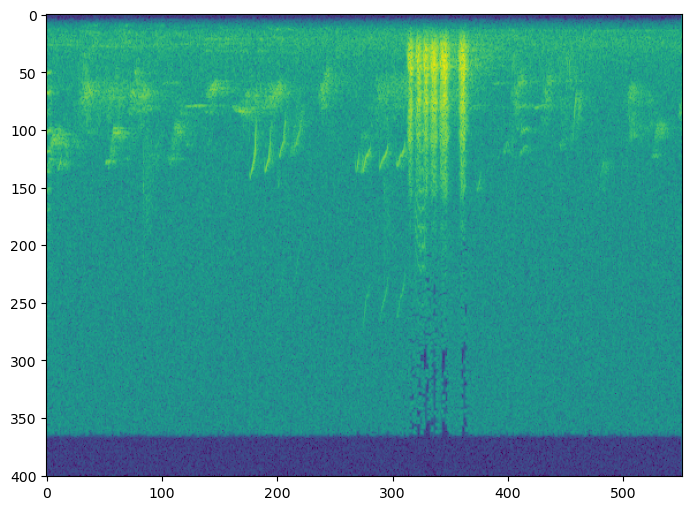

In [114]:
#checking manually 
#generate random number in range 
indexes = [39, 46, 50, 60, 61, 62, 63, 85, 118, 182, 184, 185, 188, 189, 191, 193, 251, 257, 275, 297, 406, 413, 528, 548, 551, 564, 571, 580, 581, 584, 585, 587, 589, 599, 604, 607, 646, 648, 733, 808, 856, 869, 872, 874, 939, 951, 970, 1030, 1087, 1091, 1094, 1125, 1149, 1150, 1151, 1152, 1154, 1155, 1247, 1250, 1252, 1253, 1255, 1263, 1287, 1295, 1310, 1323, 1332, 1346, 1355, 1359, 1459, 1460, 1468, 1471, 1474, 1481, 1483, 1484, 1485, 1487, 1490, 1491, 1493, 1495, 1496, 1497, 1502, 1508, 1515, 1516, 1517, 1519, 1521, 1523, 1524, 1539, 1549, 1553, 1561, 1562, 1566, 1567, 1574, 1586, 1588, 1592, 1594, 1637, 1688, 1694, 1696, 1705, 1706, 1709, 1713, 1720, 1725, 1817, 1820, 1821, 1823, 1832, 1868, 1871, 1872, 1879, 1887, 1895, 1901, 1902, 1903, 1905, 1906, 1908, 1914, 1916, 1917, 1922, 1926, 1927, 1934, 1939, 1974, 2133, 2161, 2164, 2165, 2166, 2168, 2169, 2171, 2187, 2188, 2189, 2191, 2192, 2197, 2255, 2258, 2261, 2276, 2289, 2302, 2306, 2315, 2338, 2340, 2341, 2342, 2343, 2344, 2346, 2395, 2423, 2430, 2432, 2436, 2439, 2440, 2442, 2443, 2444, 2445, 2446, 2449, 2451, 2455, 2463, 2464, 2471, 2531, 2603, 2604, 2606, 2607, 2608, 2609, 2617, 2629, 2638, 2645, 2648, 2651, 2661, 2662, 2671, 2672, 2686, 2687, 2692, 2693, 2712, 2728, 2738, 2747, 2869, 2888, 2890, 2895, 2896, 2901, 2904, 2906, 2911, 2917, 2923, 2925, 2926, 2927, 2929, 2930, 2931, 2938, 2939, 2941, 2944, 2960, 3007, 3074, 3079, 3102, 3103, 3104, 3105, 3106, 3113, 3115, 3120, 3121, 3122, 3138, 3140, 3146, 3184, 3187, 3197, 3198, 3202, 3210, 3214, 3220, 3224, 3245, 3251, 3271, 3303, 3351, 3352, 3383, 3386, 3389, 3391, 3393, 3396, 3397, 3401, 3403, 3412, 3415, 3424, 3425, 3428, 3430, 3458, 3462, 3463, 3464, 3468, 3484, 3485, 3489, 3492, 3507, 3508, 3509, 3515]
index = indexes[21] #[7] (missing bird sound), 16
#get the path of the item at the specified index
audio_file_path = df_metadata.loc[index, "path"]
#get the class id 
class_id = df_metadata.loc[index, "class_id"]
#get the english bird name 
name = df_metadata.loc[index, "english_cname"]

#get the spectrogram 
waveform, sample_rate = AudioUtil.open_file(audio_file_path)        
spectrogram = AudioUtil.get_spectrogram(waveform)

print(f"Shape of spectrograms: {spectrogram.size()}, Class ids: {class_id}")
plt.figure(figsize=(10, 6))
plt.imshow(spectrogram[0,:,:].numpy())

#make the sound wave availalbe
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [106]:
flattened_tensor = spectrogram.reshape(-1)
print("Original tensor dimensions:", flattened_tensor.shape)
print(torch.max(flattened_tensor))



# Assuming your tensor is named 'spectrogram_tensor'

# Use torch.argmax to get the index of the largest value
index_of_max_value = torch.argmax(flattened_tensor)
print(index_of_max_value) 

Original tensor dimensions: torch.Size([221352])
tensor(31.0330)
tensor(55779)


In [113]:
import numpy as np

# Assuming your tensor is named 'spectrogram_tensor'
threshold = 0 # Adjust this threshold based on your data

# Count the number of values above the threshold
num_values_above_threshold = np.count_nonzero(spectrogram > threshold)

print(f"Number of values above the threshold: {num_values_above_threshold}")

# You can also print the percentage of values above the threshold
total_values = np.prod(spectrogram.shape)
percentage_above_threshold = (num_values_above_threshold / total_values) * 100
print(f"Percentage of values above the threshold: {percentage_above_threshold}%")


Number of values above the threshold: 1562
Percentage of values above the threshold: 0.7056633777874155%


In [66]:
import torch

# Assuming your tensor is named 'spectrogram_tensor'
k = 100  # Number of largest values to retrieve

# Use torch.topk to get the largest k values
flat_tensor = spectrogram.reshape(-1)
top_values, _ = torch.topk(flat_tensor, k)

print(torch.min(top_values))
print(f"Largest {k} values in the tensor: {top_values.numpy()}")



tensor(5.3679)
Largest 100 values in the tensor: [21.824753  21.295074  18.892887  18.170212  17.814238  17.07032
 16.129404  15.841034  15.660393  15.425296  15.192999  15.000885
 14.923902  14.863768  14.592306  14.154883  14.143303  13.917378
 13.866133  13.856019  13.503408  13.483299  13.332344  13.297142
 13.284326  13.2470875 13.108634  12.553335  12.046452  12.043642
 12.027313  11.935873  11.902398  11.870512  11.665253  11.616926
 11.611175  11.115228  11.097263  10.960075  10.925454  10.452162
 10.373436  10.332746  10.2929325 10.272446  10.206118  10.1574745
 10.131788   9.931947   9.567734   9.395682   9.297575   9.171449
  9.124411   8.92374    8.67077    8.445102   8.381197   8.344841
  8.190339   8.159674   8.13761    8.113223   8.111793   8.081089
  8.06975    8.003293   8.001081   7.9278765  7.786357   7.644046
  7.629585   7.569619   7.5631766  7.5171785  7.5055337  7.402149
  7.343383   7.329838   7.108453   7.0819435  7.033195   6.9801893
  6.9085     6.9057302  6.

In [75]:
selected_part = flattened_tensor[51314:51334]

print("Selected part of the tensor:")
print(selected_part)
print("Original tensor dimensions:", spectrogram.shape)


Selected part of the tensor:
tensor([-43.0355, -39.4663, -47.8313, -46.0901, -32.4385, -25.8778, -28.5062,
         -7.5477,   3.0246,  18.8929,  21.8248,  10.1575,  -3.0365,  -1.2247,
         -1.5070,  -3.7779,  -7.5233, -11.5843, -14.2927, -14.3764])
Original tensor dimensions: torch.Size([1, 401, 552])
